In [1]:
import pandas as pd
import numpy as np
import csv
from math import floor
from matplotlib import pyplot as plt
import matplotlib
from li_s_battery_init import inputs
from li_s_battery_init import cathode as cat
from li_s_battery_init import anode as an
from li_s_battery_post import tag_strings
import os
import sys
owd = os.getcwd()


Density for cascade
Using cascade
Inputs check
[0.51821348]
[1.85572248 1.72046876 1.63496354 1.53650298 1.11415899]
Eps_C_0 = 0.056047197640118
A_S = 12914.86107307806
A_L = 77.16624578489818
A_C = 13503.986340568545
Porosity = 0.8521553627463555
Elyte/sulfur ratio  [6.84606829]
solid sulfur = 0.019
External current = [-3.29603086]
Initialization check


In [46]:
# Function definitions
def get_file_name(find_string, dir_path, **kwargs):
    flag = kwargs.get('flag', None)
    full_list = os.listdir(dir_path)
    if flag:
        file_name = [file for file in full_list if find_string in file]
    else:
        file_name = [file for file in full_list if find_string in file][0]
        
    return file_name

def df_name(file_name_list, file_number):
    file_name = file_name_list[file_number]
    df_name = file_name.split('_')
    return df_name[0]

def read_file(file_name_list):
    df_dict = {}
    for i in np.arange(0, len(file_name_list)):
        name = df_name(file_name_list, i)
        df_dict[name] = pd.read_csv(file_name_list[i])
    return df_dict

def sort_df(SV):
    Vcell = {}
    Capacity = {}
    C_k = {}
    C_Lip = {}
    C_TFSI = {}
    keys = list(SV.keys())
    tags = tag_strings(SV['dch0.1C'])
    keys_Lip = np.array([])
    keys_TFSI = np.array([])
    for i in np.arange(0, len(SV.keys())):
        offset = i*9
        Crate = keys[i]
        Vcell[Crate] = SV[Crate]['Phi_ed1']
        Capacity[Crate] = SV[Crate]['Time']
        C_k[Crate] = SV[Crate][tags['rho_el']]
        for key in SV[Crate]:
            if key.startswith('rho_Li+(e)'):
                keys_Lip = np.append(keys_Lip, key) 
            elif key.startswith('rho_TFSI-(e)'):
                keys_TFSI = np.append(keys_TFSI, key)
                
        C_Lip[Crate] = SV[Crate][keys_Lip]
        C_TFSI[Crate] = SV[Crate][keys_TFSI]
    return Vcell, Capacity, C_k, C_Lip, C_TFSI

def sort_df_short(SV):
    Vcell = {}
    Capacity = {}
    C_k = {}
    C_Lip = {}
    keys = list(SV.keys())
    tags = tag_strings(SV['dch0.1C'])
    keys_Lip = np.array([])
    for i in np.arange(0, len(SV.keys())):
        offset = i*9
        Crate = keys[i]
        Vcell[Crate] = SV[Crate]['Phi_ed1']
        Capacity[Crate] = SV[Crate]['Time']
        C_k[Crate] = SV[Crate][tags['rho_el']]
        print(tags['rho_el'])
        for key in SV[Crate]:
            if key.startswith('rho_Li+(e)'):
                keys_Lip = np.append(keys_Lip, key)        
        C_Lip[Crate] = SV[Crate][keys_Lip]
    return Vcell, Capacity, C_k, C_Lip

In [18]:
os.chdir(owd)
Lithiated_85pct_25um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 85% porosity', flag=1)
Lithiated_4uL_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 4 uL', flag=1)
Lithiated_3uL_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 3 uL', flag=1)
Lithiated_2uL_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 2 uL', flag=1)
#Lithiated_85pct_20um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 85% porosity 20 um sep', flag=1)
#Lithiated_85pct_15um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 85% porosity 15 um sep', flag=1)
#Lithiated_85pct_10um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 85% porosity 10 um sep', flag=1)

Lithiated_65pct_25um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 65% porosity', flag=1)
#Lithiated_65pct_20um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 65% porosity 20 um sep', flag=1)
#Lithiated_65pct_15um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 65% porosity 15 um sep', flag=1)
#Lithiated_65pct_10um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 65% porosity 10 um sep', flag=1)

#Lithiated_45pct_25um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 45% porosity', flag=1)
#Lithiated_45pct_20um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 45% porosity 20 um sep', flag=1)
#Lithiated_45pct_15um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 45% porosity 15 um sep', flag=1)
#Lithiated_45pct_10um_files = get_file_name('.csv', 'Lithiated Data/100 um cathode 45% porosity 10 um sep', flag=1)

cascade_85pct_25um_files = get_file_name('.csv', 'Cascade Data/100 um cathode 85% porosity', flag=1)
cascade_65pct_25um_files = get_file_name('.csv', 'Cascade Data/100 um cathode 65% porosity', flag=1)
cascade_45pct_25um_files = get_file_name('.csv', 'Cascade Data/100 um cathode 45% porosity', flag=1)

kuzmina_85pct_25um_files = get_file_name('.csv', 'Kuzmina Data/100 um cathode 85% porosity', flag=1)
kuzmina_65pct_25um_files = get_file_name('.csv', 'Kuzmina Data/100 um cathode 65% porosity', flag=1)
kuzmina_45pct_25um_files = get_file_name('.csv', 'Kuzmina Data/100 um cathode 45% porosity', flag=1)

assary_85pct_25um_files = get_file_name('.csv', 'Assary Data/100 um cathode 85% porosity', flag=1)
assary_65pct_25um_files = get_file_name('.csv', 'Assary Data/100 um cathode 65% porosity', flag=1)
assary_45pct_25um_files = get_file_name('.csv', 'Assary Data/100 um cathode 45% porosity', flag=1)

bessler_85pct_25um_files = get_file_name('.csv', 'Bessler Data/100 um cathode 85% porosity 25 um sep', flag=1)
bessler_85pct_10um_files = get_file_name('.csv', 'Bessler Data/100 um cathode 85% porosity 10 um sep', flag=1)
bessler_ver_files = get_file_name('.csv', 'Bessler Data/Bessler microstructure', flag=1)

In [19]:
# Import lithiated cascade files with 100 um cat, 25um sep, and 85% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 85% porosity')
lithiated_85pct25um = read_file(Lithiated_85pct_25um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat 4 uL E/S
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 4 uL')
lithiated_4uL = read_file(Lithiated_4uL_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat 3 uL E/S
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 3 uL')
lithiated_3uL = read_file(Lithiated_3uL_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat 2 uL E/S
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 2 uL')
lithiated_2uL = read_file(Lithiated_2uL_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 20um sep, and 85% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 85% porosity 20 um sep')
#lithiated_85pct20um = read_file(Lithiated_85pct_20um_files)
#os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 15um sep, and 85% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 85% porosity 15 um sep')
#lithiated_85pct15um = read_file(Lithiated_85pct_15um_files)
#os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 10um sep, and 85% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 85% porosity 10 um sep')
#lithiated_85pct10um = read_file(Lithiated_85pct_10um_files)
#os.chdir(owd)
#-------------------------------------------------------------------------------
# Import lithiated cascade files with 100 um cat, 25um sep, and 65% porosity cat
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 65% porosity')
lithiated_65pct25um = read_file(Lithiated_65pct_25um_files)
os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 20um sep, and 65% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 65% porosity 20 um sep')
#lithiated_65pct20um = read_file(Lithiated_65pct_20um_files)
#os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 25um sep, and 65% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 65% porosity 15 um sep')
#lithiated_65pct15um = read_file(Lithiated_65pct_15um_files)
#os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 10um sep, and 65% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 65% porosity 10 um sep')
#lithiated_65pct10um = read_file(Lithiated_65pct_10um_files)
#os.chdir(owd)
#-------------------------------------------------------------------------------
# Import lithiated cascade files with 100 um cat, 25um sep, and 45% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 45% porosity')
#lithiated_45pct25um = read_file(Lithiated_45pct_25um_files)
#os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 20um sep, and 45% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 45% porosity 20 um sep')
#lithiated_45pct20um = read_file(Lithiated_45pct_20um_files)
#os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 10um sep, and 45% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 45% porosity 15 um sep')
#lithiated_45pct15um = read_file(Lithiated_45pct_15um_files)
#os.chdir(owd)

# Import lithiated cascade files with 100 um cat, 10um sep, and 45% porosity cat
#os.chdir(owd)
#os.chdir('Lithiated Data/100 um cathode 45% porosity 10 um sep')
#lithiated_45pct10um = read_file(Lithiated_45pct_10um_files)
#os.chdir(owd)

In [20]:
# Import non-lithiated cascade files with 100 um cat, 25um sep
os.chdir(owd)
os.chdir('Cascade Data/100 um cathode 85% porosity')
cascade_85pct25um = read_file(cascade_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Cascade Data/100 um cathode 65% porosity')
cascade_65pct25um = read_file(cascade_65pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Cascade Data/100 um cathode 45% porosity')
cascade_45pct25um = read_file(cascade_45pct_25um_files)
os.chdir(owd)

In [21]:
# Import Kuzmina files with 100 um cat, 25um sep
os.chdir(owd)
os.chdir('Kuzmina Data/100 um cathode 85% porosity')
kuzmina_85pct25um = read_file(kuzmina_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Kuzmina Data/100 um cathode 65% porosity')
kuzmina_65pct25um = read_file(kuzmina_65pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Kuzmina Data/100 um cathode 45% porosity')
kuzmina_45pct25um = read_file(kuzmina_45pct_25um_files)
os.chdir(owd)

In [22]:
# Import Assary files with 100 um cat, 25um sep
os.chdir(owd)
os.chdir('Assary Data/100 um cathode 85% porosity')
assary_85pct25um = read_file(assary_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Assary Data/100 um cathode 65% porosity')
assary_65pct25um = read_file(assary_65pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Assary Data/100 um cathode 45% porosity')
assary_45pct25um = read_file(assary_45pct_25um_files)
os.chdir(owd)

In [23]:
# Import Bessler files with 100 um cat, 85% porosity
os.chdir(owd)
os.chdir('Bessler Data/100 um cathode 85% porosity 25 um sep')
bessler_85pct25um = read_file(bessler_85pct_25um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Bessler Data/100 um cathode 85% porosity 10 um sep')
bessler_85pct10um = read_file(bessler_85pct_10um_files)
os.chdir(owd)

os.chdir(owd)
os.chdir('Bessler Data/Bessler microstructure')
bessler_ver = read_file(bessler_ver_files)
os.chdir(owd)

In [55]:
Vcell_Li_85pct25um, Cap_Li_85pct25um, C_k_Li_85pct25um, C_Lip_85pct25um, C_TFSI_85pct25um = sort_df(lithiated_85pct25um)
Vcell_Li_4uL, Cap_Li_4uL, C_k_Li_4uL, C_Lip_4uL, C_TFSI_4uL = sort_df(lithiated_4uL)
Vcell_Li_3uL, Cap_Li_3uL, C_k_Li_3uL, C_Lip_3uL, C_TFSI_3uL = sort_df(lithiated_3uL)
Vcell_Li_2uL, Cap_Li_2uL, C_k_Li_2uL, C_Lip_2uL, C_TFSI_2uL = sort_df(lithiated_2uL)
#Vcell_Li_85pct20um, Cap_Li_85pct20um, C_k_Li_85pct20um, C_Lip_85pct20um = sort_df(lithiated_85pct20um)
#Vcell_Li_85pct15um, Cap_Li_85pct15um, C_k_Li_85pct15um, C_Lip_85pct15um = sort_df(lithiated_85pct15um)
#Vcell_Li_85pct10um, Cap_Li_85pct10um, C_k_Li_85pct10um, C_Lip_85pct10um = sort_df(lithiated_85pct10um)

Vcell_Li_65pct25um, Cap_Li_65pct25um, C_k_Li_65pct25um, C_Lip_65pct25um, C_TFSI_65pct25um = sort_df(lithiated_65pct25um)
#Vcell_Li_65pct20um, Cap_Li_65pct20um, C_k_Li_65pct20um, C_Lip_65pct20um = sort_df(lithiated_65pct20um)
#Vcell_Li_65pct15um, Cap_Li_65pct15um, C_k_Li_65pct15um, C_Lip_65pct15um = sort_df(lithiated_65pct15um)
#Vcell_Li_65pct10um, Cap_Li_65pct10um, C_k_Li_65pct10um, C_Lip_65pct10um = sort_df(lithiated_65pct10um)

#Vcell_Li_45pct25um, Cap_Li_45pct25um, C_k_Li_45pct25um, C_Lip_45pct25um = sort_df(lithiated_45pct25um)
#Vcell_Li_45pct20um, Cap_Li_45pct20um, C_k_Li_45pct20um, C_Lip_45pct20um = sort_df(lithiated_45pct20um)
#Vcell_Li_45pct15um, Cap_Li_45pct15um, C_k_Li_45pct15um, C_Lip_45pct15um = sort_df(lithiated_45pct15um)
#Vcell_Li_45pct10um, Cap_Li_45pct10um, C_k_Li_45pct10um, C_Lip_45pct10um = sort_df(lithiated_45pct10um)

In [56]:
Vcell_cascade_85pct25um, Cap_cascade_85pct25um, C_k_cascade_85pct25um, C_Lip_cascade_85pct25um, C_cascade_TFSI_85pct25um = sort_df(cascade_85pct25um)
Vcell_cascade_65pct25um, Cap_cascade_65pct25um, C_k_cascade_65pct25um, C_Lip_cascade_65pct25um, C_cascade_TFSI_65pct25um = sort_df(cascade_65pct25um)
Vcell_cascade_45pct25um, Cap_cascade_45pct25um, C_k_cascade_45pct25um, C_Lip_cascade_45pct25um, C_cascade_TFSI_45pct25um = sort_df(cascade_45pct25um)

In [49]:
Vcell_kuzmina_85pct25um, Cap_kuzmina_85pct25um, C_k_kuzmina_85pct25um, C_Lip_kuzmina_85pct25um, C_TFSI_kuzmina_85pct25um = sort_df(kuzmina_85pct25um)
Vcell_kuzmina_65pct25um, Cap_kuzmina_65pct25um, C_k_kuzmina_65pct25um, C_Lip_kuzmina_65pct25um, C_TFSI_kuzmina_65pct25um = sort_df(kuzmina_65pct25um)
Vcell_kuzmina_45pct25um, Cap_kuzmina_45pct25um, C_k_kuzmina_45pct25um, C_Lip_kuzmina_45pct25um, C_TFSI_kuzmina_45pct25um = sort_df(kuzmina_45pct25um)

In [50]:
Vcell_assary_85pct25um, Cap_assary_85pct25um, C_k_assary_85pct25um, C_Lip_assary_85pct25um, C_TFSI_assary_85pct25um = sort_df(assary_85pct25um)
Vcell_assary_65pct25um, Cap_assary_65pct25um, C_k_assary_65pct25um, C_Lip_assary_65pct25um, C_TFSI_assary_65pct25um = sort_df(assary_65pct25um)
Vcell_assary_45pct25um, Cap_assary_45pct25um, C_k_assary_45pct25um, C_Lip_assary_45pct25um, C_TFSI_assary_45pct25um = sort_df(assary_45pct25um)

In [31]:
#Vcell_bessler_85pct25um, Cap_bessler_85pct25um, C_k_bessler_85pct25um = sort_df(bessler_85pct25um)
#Vcell_bessler_85pct10um, Cap_bessler_85pct10um, C_k_bessler_85pct10um = sort_df(bessler_85pct10um)

In [32]:
#Vcell_bessler_ver, Cap_bessler_ver, C_k_bessler_ver = sort_df(bessler_ver)

In [33]:
fs = 14
font = 'Times New Roman'
lw = 2.0
keys = ['dch0.1C', 'dch0.2C', 'dch0.3C', 'dch0.4C', 'dch0.5C', 'dch0.6C', 'dch0.7C',
        'dch0.8C', 'dch0.9C', 'dch1.0C', 'dch1.1C', 'dch1.2C', 'dch1.3C',
        'dch1.4C', 'dch1.5C']
keys_s = ['dch0.1C', 'dch0.5C', 'dch1.0C', 'dch1.5C']
tags = tag_strings(lithiated_85pct25um['dch0.1C'])
species = ['S8', 'Li2S8', 'Li2S6', 'Li2S4', 'Li2S2', 'Li2S']
grad = np.linspace(0, 1, 6)
species_cmap = np.zeros((len(grad),4))
for i, val in enumerate(grad):
    species_cmap[i] = matplotlib.cm.plasma(val)
colormap = plt.cm.get_cmap('plasma')
print(species_cmap)

[[5.03830e-02 2.98030e-02 5.27975e-01 1.00000e+00]
 [4.17642e-01 5.64000e-04 6.58390e-01 1.00000e+00]
 [6.92840e-01 1.65141e-01 5.64522e-01 1.00000e+00]
 [8.81443e-01 3.92529e-01 3.83229e-01 1.00000e+00]
 [9.88260e-01 6.52325e-01 2.11364e-01 1.00000e+00]
 [9.40015e-01 9.75158e-01 1.31326e-01 1.00000e+00]]


In [ ]:
#C_Lip_85pct25um['dch0.1C']

# Section 1 - plotting cell voltage at various C-rates 

## 1.1 100 um 85% porous cathode 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 85% porosity 25 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct25um[keys[i]], Vcell_Li_85pct25um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.2 100 um 85% porous cathode 20 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 85% porosity 20 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct20um[keys[i]], Vcell_Li_85pct20um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.3 100 um 85% porous cathode 15 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 85% porosity 15 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct15um[keys[i]], Vcell_Li_85pct15um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.4 100 um 85% porous cathode 10 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 85% porosity 10 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct10um[keys[i]], Vcell_Li_85pct10um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.5 100 um 65% porous cathode 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 65% porosity 25 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_65pct25um[keys[i]], Vcell_Li_65pct25um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.6 100 um 45% porous cathode 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 45% porosity 25 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_45pct25um[keys[i]], Vcell_Li_45pct25um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

## 1.7 100 um 45% porous cathode 10 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/100 um 45% porosity 10 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_45pct10um[keys[i]], Vcell_Li_45pct10um[keys[i]], 'k-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    if i == len(keys)-1:
        fig.savefig('Vcell_range.png')
os.chdir(owd)

# Section 2 - Plotting voltage of varying designs at C-rate

## Comparison of lithiated mech. and Andrei data

In [ ]:
exp_data_01C = pd.read_csv(r'0.1C Data.csv', header=None)
exp_data_05C = pd.read_csv(r'0.5C Data.csv', header=None)
exp_data_1C = pd.read_csv(r'1C Data.csv', header=None)

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Andrei validation')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((3., 2.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
print(keys_s)
p1, = plt.plot(Cap_Li_85pct25um[keys_s[0]], Vcell_Li_85pct25um[keys_s[0]], 'k-', linewidth=lw)
p2, = plt.plot(Cap_Li_85pct25um[keys_s[1]], Vcell_Li_85pct25um[keys_s[1]], 'r-', linewidth=lw)
p3, = plt.plot(Cap_Li_85pct25um[keys_s[2]], Vcell_Li_85pct25um[keys_s[2]], 'b-', linewidth=lw)

p4, = plt.plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'ko', markersize=2.)
p5, = plt.plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'ro', markersize=2.)
p6, = plt.plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'bo', markersize=2.)

plt.xlim((0, 1450))
plt.xticks([0, 400, 800, 1200])
plt.ylim((1.8, 2.4))

fig.savefig('Vcell_Andrei_data.pdf')
os.chdir(owd)

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Andrei comparison')

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, num=i)
plt.tight_layout()
axs[0].tick_params(direction='in')
axs[1].tick_params(direction='in')
fig.set_size_inches((6., 2.))

for tick in axs[0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
    
#for tick in axs[2].xaxis.get_major_ticks():
#    tick.label1.set_fontsize(fs)
#    tick.label1.set_fontname(font)
#for tick in axs[2].yaxis.get_major_ticks():
#    tick.label1.set_fontsize(fs)
#    tick.label1.set_fontname(font)

axs[0].plot(Cap_Li_85pct25um[keys_s[0]], Vcell_Li_85pct25um[keys_s[0]], 'k-', linewidth=lw)
axs[0].plot(Cap_Li_85pct25um[keys_s[1]], Vcell_Li_85pct25um[keys_s[1]], 'r-', linewidth=lw)
axs[0].plot(Cap_Li_85pct25um[keys_s[2]], Vcell_Li_85pct25um[keys_s[2]], 'b-', linewidth=lw)
 
axs[0].plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'ko', markersize=2.)
axs[0].plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'ro', markersize=2.)
axs[0].plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'bo', markersize=2.)
    
axs[1].plot(Cap_cascade_85pct25um[keys_s[0]], Vcell_cascade_85pct25um[keys_s[0]], 'k-', linewidth=lw)
axs[1].plot(Cap_cascade_85pct25um[keys_s[1]], Vcell_cascade_85pct25um[keys_s[1]], 'r-', linewidth=lw)
axs[1].plot(Cap_cascade_85pct25um[keys_s[2]], Vcell_cascade_85pct25um[keys_s[2]], 'b-', linewidth=lw)

axs[1].plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'ko', markersize=2.)
axs[1].plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'ro', markersize=2.)
axs[1].plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'bo', markersize=2.)

#axs[2].plot(Cap_bessler_85pct25um[keys_s[0]], Vcell_bessler_85pct25um[keys_s[0]], 'k-', linewidth=lw)
#axs[2].plot(Cap_bessler_85pct25um[keys_s[1]], Vcell_bessler_85pct25um[keys_s[1]], 'r-', linewidth=lw)
#axs[2].plot(Cap_bessler_85pct25um[keys_s[2]], Vcell_bessler_85pct25um[keys_s[2]], 'b-', linewidth=lw)

#axs[2].plot(exp_data_01C.iloc[:,0], exp_data_01C.iloc[:,1], 'ko', markersize=2.)
#axs[2].plot(exp_data_05C.iloc[:,0], exp_data_05C.iloc[:,1], 'ro', markersize=2.)
#axs[2].plot(exp_data_1C.iloc[:,0], exp_data_1C.iloc[:,1], 'bo', markersize=2.)

axs[0].set_xlabel('Capacity [Ah/kg_s]')
axs[1].set_xlabel('Capacity [Ah/kg_s]')
axs[0].set_ylabel('Voltage [V]')
plt.xlim((0, 1450))
plt.xticks([0, 400, 800, 1200])
plt.ylim((1.8, 2.4))

fig.savefig('Vcell_Andrei_data.pdf')
os.chdir(owd)

## Comparison of lithiated, non-lithiated, Assary, and Kuzmina mechs. voltage versus capacity

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/mechanism comparison')

fig, axs = plt.subplots(4, 2, sharex=True, sharey=False, num=i)
plt.tight_layout()
axs[0,0].tick_params(direction='in')
axs[1,0].tick_params(direction='in')
axs[2,0].tick_params(direction='in')
axs[3,0].tick_params(direction='in')
fig.set_size_inches((6., 5.))

for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[2,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[2,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[3,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[3,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
    
for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[2,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[2,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[3,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[3,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

axs[0,0].plot(Cap_Li_65pct25um[keys_s[0]], Vcell_Li_65pct25um[keys_s[0]], linewidth=lw)
axs[0,0].plot(Cap_Li_65pct25um[keys_s[1]], Vcell_Li_65pct25um[keys_s[1]], linewidth=lw)
axs[0,0].plot(Cap_Li_65pct25um[keys_s[2]], Vcell_Li_65pct25um[keys_s[2]], linewidth=lw)
axs[0,0].plot(Cap_Li_65pct25um[keys_s[3]], Vcell_Li_65pct25um[keys_s[3]], linewidth=lw)

axs[1,0].plot(Cap_cascade_65pct25um[keys_s[0]], Vcell_cascade_65pct25um[keys_s[0]], linewidth=lw)
axs[1,0].plot(Cap_cascade_65pct25um[keys_s[1]], Vcell_cascade_65pct25um[keys_s[1]], linewidth=lw)
axs[1,0].plot(Cap_cascade_65pct25um[keys_s[2]], Vcell_cascade_65pct25um[keys_s[2]], linewidth=lw)
axs[1,0].plot(Cap_cascade_65pct25um[keys_s[3]], Vcell_cascade_65pct25um[keys_s[3]], linewidth=lw)

axs[2,0].plot(Cap_assary_65pct25um[keys_s[0]], Vcell_assary_65pct25um[keys_s[0]], linewidth=lw)
axs[2,0].plot(Cap_assary_65pct25um[keys_s[1]], Vcell_assary_65pct25um[keys_s[1]], linewidth=lw)
axs[2,0].plot(Cap_assary_65pct25um[keys_s[2]], Vcell_assary_65pct25um[keys_s[2]], linewidth=lw)
axs[2,0].plot(Cap_assary_65pct25um[keys_s[3]], Vcell_assary_65pct25um[keys_s[3]], linewidth=lw)

axs[3,0].plot(Cap_kuzmina_65pct25um[keys_s[0]], Vcell_kuzmina_65pct25um[keys_s[0]], linewidth=lw)
axs[3,0].plot(Cap_kuzmina_65pct25um[keys_s[1]], Vcell_kuzmina_65pct25um[keys_s[1]], linewidth=lw)
axs[3,0].plot(Cap_kuzmina_65pct25um[keys_s[2]], Vcell_kuzmina_65pct25um[keys_s[2]], linewidth=lw)
axs[3,0].plot(Cap_kuzmina_65pct25um[keys_s[3]], Vcell_kuzmina_65pct25um[keys_s[3]], linewidth=lw)

for i in np.arange(0, 1, 1):
    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        for k in np.arange(0, 6):
            axs[0,1].plot(Cap_Li_65pct25um[keys_s[i]], C_k_Li_65pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[1,1].plot(Cap_cascade_65pct25um[keys_s[i]], C_k_cascade_65pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[2,1].plot(Cap_assary_65pct25um[keys_s[i]], C_k_assary_65pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=species_cmap[k])
            axs[3,1].plot(Cap_kuzmina_65pct25um[keys_s[i]], C_k_kuzmina_65pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=species_cmap[k])

axs[0,0].title.set_text('Lithiated')
axs[1,0].title.set_text('Non-Lithiated')
axs[2,0].title.set_text('Assary')
axs[3,0].title.set_text('Kuzmina')

axs[0,1].title.set_text('Lithiated')
axs[1,1].title.set_text('Non-Lithiated')
axs[2,1].title.set_text('Assary')
axs[3,1].title.set_text('Kuzmina')
#plt.legend(['0.1C', '0.5C', '1C', '1.5C'])
plt.xlim((0, 1450))
plt.xticks([0, 400, 800, 1200])

axs[0,0].set_ylim((1.8,2.4))
axs[1,0].set_ylim((1.8,2.4))
axs[2,0].set_ylim((1.8,2.4))
axs[3,0].set_ylim((1.8,2.4))
axs[0,0].set_yticks([1.8, 2.0, 2.2, 2.4])
axs[1,0].set_yticks([1.8, 2.0, 2.2, 2.4])
axs[2,0].set_yticks([1.8, 2.0, 2.2, 2.4])
axs[3,0].set_yticks([1.8, 2.0, 2.2, 2.4])

axs[0,0].set_ylabel('Voltage [V]')
axs[1,0].set_ylabel('Voltage [V]')
axs[2,0].set_ylabel('Voltage [V]')
axs[3,0].set_ylabel('Voltage [V]')

axs[0,1].set_ylim((0.0,1.1))
axs[1,1].set_ylim((0.0,1.1))
axs[2,1].set_ylim((0.0,1.1))
axs[3,1].set_ylim((0.0,1.1))
axs[0,1].set_yticks([0.0, 0.5, 1.0])
axs[1,1].set_yticks([0.0, 0.5, 1.0])
axs[2,1].set_yticks([0.0, 0.5, 1.0])
axs[3,1].set_yticks([0.0, 0.5, 1.0])

axs[0,1].set_ylabel('C_k [kmol_k/m^3]')
axs[1,1].set_ylabel('C_k [kmol_k/m^3]')
axs[2,1].set_ylabel('C_k [kmol_k/m^3]')
axs[3,1].set_ylabel('C_k [kmol_k/m^3]')

fig.savefig('Vcell_mech_comp.pdf')
os.chdir(owd)

## Comparison of lithiated and non-lithiated mechanisms species profiles and Li+ concentration

In [ ]:
os.chdir(owd)
os.chdir('Figures/species concentrations/mechanism comparison')

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, num=1)
plt.tight_layout()
axs[0,0].tick_params(direction='in')
axs[1,0].tick_params(direction='in')
axs[0,1].tick_params(direction='in')
axs[1,1].tick_params(direction='in')
fig.set_size_inches((6., 5.))

for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
    

for j in np.arange(0, inputs.npoints_cathode):
    offset = j*6
    for k in np.arange(0, 6):
        axs[0,0].plot(Cap_Li_65pct25um[keys_s[2]], C_k_Li_65pct25um[keys_s[2]].iloc[:, k+offset], 
                 linewidth=lw/2, color=species_cmap[k], alpha=j/inputs.npoints_cathode)
        axs[0,1].plot(Cap_cascade_65pct25um[keys_s[2]], C_k_cascade_65pct25um[keys_s[2]].iloc[:, k+offset], 
                 linewidth=lw/2, color=species_cmap[k], alpha=j/inputs.npoints_cathode)
            
dx = inputs.H_cat/inputs.npoints_cathode
x_cat = np.arange(0+dx/2, inputs.H_cat, dx)
for j in np.arange(0, len(Cap_Li_65pct25um[keys_s[2]]), 10):
    #print(x_cat)
    #print(C_Lip_65pct25um[keys_s[2]].iloc[j, 0:inputs.npoints_cathode])
    axs[1,0].plot(x_cat, C_Lip_65pct25um[keys_s[2]].iloc[j, 0:inputs.npoints_cathode],
                  'k-', alpha=j/len(Cap_Li_65pct25um[keys_s[2]]))

for j in np.arange(0, len(Cap_cascade_65pct25um[keys_s[2]]), 10):
    axs[1,1].plot(x_cat, C_Lip_cascade_65pct25um[keys_s[2]].iloc[j, 0:inputs.npoints_cathode],
                  'k-', alpha=j/len(Cap_Li_65pct25um[keys_s[2]]))

axs[0,0].title.set_text('Lithiated')
axs[0,1].title.set_text('Non-Lithiated')

axs[0,0].set_xlim((0, 800))
axs[0,1].set_xlim((0, 800))
axs[0,0].set_xticks([0, 400, 800])
axs[0,1].set_xticks([0, 400, 800])

axs[0,0].set_ylim((0.,1.1))
axs[0,0].set_yticks([0.0, 0.5, 1.0])
axs[0,1].set_ylim((0.,1.1))
axs[0,1].set_yticks([0.0, 0.5, 1.0])

axs[1,0].set_ylim((0, 1.1))
axs[1,0].set_yticks([0.0, 0.5, 1.0])
axs[1,1].set_ylim((0, 1.1))
axs[1,1].set_yticks([0.0, 0.5, 1.0])

axs[1,0].set_xlim((0, 100e-6))
axs[1,0].set_xticks([0, 50e-6, 100e-6])
axs[1,1].set_xlim((0, 100e-6))
axs[1,1].set_xticks([0, 50e-6, 100e-6])

axs[0,0].set_ylabel('C_k [kmol_k/m^3]')
axs[1,0].set_ylabel('C_Li+ [kmol_Li+/m^3]')


fig.savefig('Spec_and_li_comp.pdf')
os.chdir(owd)

## Comparison of varying E/S ratio with Lithiated mechanism

In [ ]:
os.chdir(owd)
os.chdir('Figures/E-S ratio comparisons')

fig, axs = plt.subplots(3, 2, sharex=True, sharey=False, num=i)
plt.tight_layout()
axs[0,0].tick_params(direction='in')
axs[1,0].tick_params(direction='in')
axs[2,0].tick_params(direction='in')
fig.set_size_inches((6., 5.))

for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[2,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[2,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
    
for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[2,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[2,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

axs[0,0].plot(Cap_Li_4uL[keys_s[0]], Vcell_Li_4uL[keys_s[0]], linewidth=lw)
axs[0,0].plot(Cap_Li_4uL[keys_s[1]], Vcell_Li_4uL[keys_s[1]], linewidth=lw)
axs[0,0].plot(Cap_Li_4uL[keys_s[2]], Vcell_Li_4uL[keys_s[2]], linewidth=lw)
axs[0,0].plot(Cap_Li_4uL[keys_s[3]], Vcell_Li_4uL[keys_s[3]], linewidth=lw)

axs[1,0].plot(Cap_Li_3uL[keys_s[0]], Vcell_Li_3uL[keys_s[0]], linewidth=lw)
axs[1,0].plot(Cap_Li_3uL[keys_s[1]], Vcell_Li_3uL[keys_s[1]], linewidth=lw)
axs[1,0].plot(Cap_Li_3uL[keys_s[2]], Vcell_Li_3uL[keys_s[2]], linewidth=lw)
axs[1,0].plot(Cap_Li_3uL[keys_s[3]], Vcell_Li_3uL[keys_s[3]], linewidth=lw)

axs[2,0].plot(Cap_Li_2uL[keys_s[0]], Vcell_Li_2uL[keys_s[0]], linewidth=lw)
axs[2,0].plot(Cap_Li_2uL[keys_s[1]], Vcell_Li_2uL[keys_s[1]], linewidth=lw)
axs[2,0].plot(Cap_Li_2uL[keys_s[2]], Vcell_Li_2uL[keys_s[2]], linewidth=lw)
axs[2,0].plot(Cap_Li_2uL[keys_s[3]], Vcell_Li_2uL[keys_s[3]], linewidth=lw)

for i in np.arange(0, 1, 1):
    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        for k in np.arange(0, 6):
            axs[0,1].plot(Cap_Li_4uL[keys_s[i]], C_k_Li_4uL[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[1,1].plot(Cap_Li_3uL[keys_s[i]], C_k_Li_3uL[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[2,1].plot(Cap_Li_2uL[keys_s[i]], C_k_Li_2uL[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=species_cmap[k])

axs[0,0].title.set_text('4 uL/mg')
axs[1,0].title.set_text('3 uL/mg')
axs[2,0].title.set_text('2 uL/mg')

axs[0,1].title.set_text('4 uL/mg')
axs[1,1].title.set_text('3 uL/mg')
axs[2,1].title.set_text('2 uL/mg')
#plt.legend(['0.1C', '0.5C', '1C', '1.5C'])
plt.xlim((0, 1450))
plt.xticks([0, 400, 800, 1200])

axs[0,0].set_ylim((1.8,2.4))
axs[1,0].set_ylim((1.8,2.4))
axs[2,0].set_ylim((1.8,2.4))
axs[0,0].set_yticks([1.8, 2.0, 2.2, 2.4])
axs[1,0].set_yticks([1.8, 2.0, 2.2, 2.4])
axs[2,0].set_yticks([1.8, 2.0, 2.2, 2.4])

axs[0,0].set_ylabel('Voltage [V]')
axs[1,0].set_ylabel('Voltage [V]')
axs[2,0].set_ylabel('Voltage [V]')

axs[0,1].set_ylim((0.0,2.5))
axs[1,1].set_ylim((0.0,2.5))
axs[2,1].set_ylim((0.0,2.5))
axs[0,1].set_yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
axs[1,1].set_yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
axs[2,1].set_yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])

axs[0,1].set_ylabel('C_k [kmol_k/m^3]')
axs[1,1].set_ylabel('C_k [kmol_k/m^3]')
axs[2,1].set_ylabel('C_k [kmol_k/m^3]')

fig.savefig('E_S_ratio_comp.pdf')
os.chdir(owd)

In [ ]:
os.chdir(owd)
os.chdir('Figures/species concentrations/mechanism comparison')

for i in np.arange(0, len(keys_s), 1):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=i)
    axs[0,0].tick_params(direction='in')
    axs[1,0].tick_params(direction='in')
    axs[0,1].tick_params(direction='in')
    axs[1,1].tick_params(direction='in')
    fig.set_size_inches((6., 4.))

    for tick in axs[0,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[0,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        for k in np.arange(0, 6):
            axs[0,0].plot(Cap_Li_65pct25um[keys_s[i]], C_k_Li_65pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[0,1].plot(Cap_cascade_65pct25um[keys_s[i]], C_k_cascade_65pct25um[keys_s[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[1,0].plot(Cap_assary_65pct25um[keys_s[i]], C_k_assary_65pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=species_cmap[k])
            axs[1,1].plot(Cap_kuzmina_65pct25um[keys_s[i]], C_k_kuzmina_65pct25um[keys_s[i]].iloc[:, k+offset],
                         linewidth=lw, color=species_cmap[k])

    axs[0,0].title.set_text('Lithiated')
    axs[0,1].title.set_text('Non-Lithiated')
    axs[1,0].title.set_text('Assary')
    axs[1,1].title.set_text('Kuzmina')
    plt.xlim((0, 1450))
    plt.xticks([0, 400, 800, 1200])

    fig.savefig('Ck_mech_comp' + keys_s[i] + '.pdf')
    os.chdir(owd)

## Varying E/S ratio over four C-rates

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Cathode porosity study 25 um sep')

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=0)
axs[0,0].tick_params(direction='in')
axs[1,0].tick_params(direction='in')
axs[0,1].tick_params(direction='in')
axs[1,1].tick_params(direction='in')
fig.set_size_inches((6., 4.))

for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

axs[0,0].plot(Cap_Li_4uL[keys_s[0]], Vcell_Li_4uL[keys_s[0]], 'k-', linewidth=lw)
axs[0,0].plot(Cap_Li_3uL[keys_s[0]], Vcell_Li_3uL[keys_s[0]], 'r-', linewidth=lw)
axs[0,0].plot(Cap_Li_2uL[keys_s[0]], Vcell_Li_2uL[keys_s[0]], 'b-', linewidth=lw)

axs[0,1].plot(Cap_Li_4uL[keys_s[1]], Vcell_Li_4uL[keys_s[1]], 'k-', linewidth=lw)
axs[0,1].plot(Cap_Li_3uL[keys_s[1]], Vcell_Li_3uL[keys_s[1]], 'r-', linewidth=lw)
axs[0,1].plot(Cap_Li_2uL[keys_s[1]], Vcell_Li_2uL[keys_s[1]], 'b-', linewidth=lw)

axs[1,0].plot(Cap_Li_4uL[keys_s[2]], Vcell_Li_4uL[keys_s[2]], 'k-', linewidth=lw)
axs[1,0].plot(Cap_Li_3uL[keys_s[2]], Vcell_Li_3uL[keys_s[2]], 'r-', linewidth=lw)
axs[1,0].plot(Cap_Li_2uL[keys_s[2]], Vcell_Li_2uL[keys_s[2]], 'b-', linewidth=lw)

axs[1,1].plot(Cap_Li_4uL[keys_s[3]], Vcell_Li_4uL[keys_s[3]], 'k-', linewidth=lw)
axs[1,1].plot(Cap_Li_3uL[keys_s[3]], Vcell_Li_3uL[keys_s[3]], 'r-', linewidth=lw)
axs[1,1].plot(Cap_Li_2uL[keys_s[3]], Vcell_Li_2uL[keys_s[3]], 'b-', linewidth=lw)
    
plt.xlim((0, 1500))
plt.ylim((1.8, 2.4))
fig.savefig('Vcell_25um_sep.pdf')
os.chdir(owd)

## Varying cathode porosity at 10 um sep over four C-rates

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Cathode porosity study 10 um sep')

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=0)
axs[0,0].tick_params(direction='in')
axs[1,0].tick_params(direction='in')
axs[0,1].tick_params(direction='in')
axs[1,1].tick_params(direction='in')
fig.set_size_inches((6., 4.))

for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

axs[0,0].plot(Cap_Li_85pct10um[keys_s[0]], Vcell_Li_85pct10um[keys_s[0]], 'k-', linewidth=lw)
axs[0,0].plot(Cap_Li_65pct10um[keys_s[0]], Vcell_Li_65pct10um[keys_s[0]], 'r-', linewidth=lw)
axs[0,0].plot(Cap_Li_45pct10um[keys_s[0]], Vcell_Li_45pct10um[keys_s[0]], 'b-', linewidth=lw)

axs[0,1].plot(Cap_Li_85pct10um[keys_s[1]], Vcell_Li_85pct10um[keys_s[1]], 'k-', linewidth=lw)
axs[0,1].plot(Cap_Li_65pct10um[keys_s[1]], Vcell_Li_65pct10um[keys_s[1]], 'r-', linewidth=lw)
axs[0,1].plot(Cap_Li_45pct10um[keys_s[1]], Vcell_Li_45pct10um[keys_s[1]], 'b-', linewidth=lw)

axs[1,0].plot(Cap_Li_85pct10um[keys_s[2]], Vcell_Li_85pct10um[keys_s[2]], 'k-', linewidth=lw)
axs[1,0].plot(Cap_Li_65pct10um[keys_s[2]], Vcell_Li_65pct10um[keys_s[2]], 'r-', linewidth=lw)
axs[1,0].plot(Cap_Li_45pct10um[keys_s[2]], Vcell_Li_45pct10um[keys_s[2]], 'b-', linewidth=lw)

axs[1,1].plot(Cap_Li_85pct10um[keys_s[3]], Vcell_Li_85pct10um[keys_s[3]], 'k-', linewidth=lw)
axs[1,1].plot(Cap_Li_65pct10um[keys_s[3]], Vcell_Li_65pct10um[keys_s[3]], 'r-', linewidth=lw)
axs[1,1].plot(Cap_Li_45pct10um[keys_s[3]], Vcell_Li_45pct10um[keys_s[3]], 'b-', linewidth=lw)
    
plt.xlim((0, 1500))
plt.ylim((1.8, 2.4))
fig.savefig('Vcell_10um_sep.pdf')
os.chdir(owd)

## Species profiles as function of C-rate

In [ ]:
os.chdir(owd)
os.chdir('Figures/species concentrations/species comparison')

for k in np.arange(0, 6, 1):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=k)
    axs[0,0].tick_params(direction='in')
    axs[1,0].tick_params(direction='in')
    axs[0,1].tick_params(direction='in')
    axs[1,1].tick_params(direction='in')
    fig.set_size_inches((6., 4.))

    for tick in axs[0,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[0,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        p1, = axs[0,0].plot(Cap_Li_65pct25um[keys_s[0]], C_k_Li_65pct25um[keys_s[0]].iloc[:, k+offset], 
                 linewidth=lw, color=species_cmap[k])
        p2, = axs[0,1].plot(Cap_Li_65pct25um[keys_s[1]], C_k_Li_65pct25um[keys_s[1]].iloc[:, k+offset], 
                 linewidth=lw, color=species_cmap[k])
        p3, = axs[1,0].plot(Cap_Li_65pct25um[keys_s[2]], C_k_Li_65pct25um[keys_s[2]].iloc[:, k+offset],
                     linewidth=lw, color=species_cmap[k])
        p4, = axs[1,1].plot(Cap_Li_65pct25um[keys_s[3]], C_k_Li_65pct25um[keys_s[3]].iloc[:, k+offset],
                     linewidth=lw, color=species_cmap[k])

    axs[0,0].title.set_text('0.1C')
    axs[0,1].title.set_text('0.5C')
    axs[1,0].title.set_text('1C')
    axs[1,1].title.set_text('1.5C')
    plt.xlim((0, 1450))
    plt.xticks([0, 400, 800, 1200])
    plt.ylim((0, 2))
    fig.savefig('Ck_' + species[k] + '.pdf')
    
os.chdir(owd)

## Li+ concentration as a function of position 10 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/species concentrations/Li+ concentrations')

for i in np.arange(0, len(keys_s), 1):
    fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, num=i)
    axs[0].tick_params(direction='in')
    axs[1].tick_params(direction='in')
    axs[2].tick_params(direction='in')
    #axs[1,1].tick_params(direction='in')
    
    fig.set_size_inches((6., 4.))

    for tick in axs[0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[2].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[2].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    #for tick in axs[1,1].xaxis.get_major_ticks():
    #    tick.label1.set_fontsize(fs)
    #    tick.label1.set_fontname(font)
    #for tick in axs[1,1].yaxis.get_major_ticks():
    #    tick.label1.set_fontsize(fs)
    #    tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        #offset = j*6
        p1, = axs[0].plot(Cap_Li_85pct10um[keys_s[i]], C_Lip_85pct10um[keys_s[i]].iloc[:, j], 
                 linewidth=lw)
        p2, = axs[1].plot(Cap_Li_65pct10um[keys_s[i]], C_Lip_65pct10um[keys_s[i]].iloc[:, j], 
                 linewidth=lw)
        p3, = axs[2].plot(Cap_Li_45pct10um[keys_s[i]], C_Lip_45pct10um[keys_s[i]].iloc[:, j],
                     linewidth=lw)

    axs[0].title.set_text('85% porosity')
    axs[1].title.set_text('65% porosity')
    axs[2].title.set_text('45% porosity')
    #axs[1,1].title.set_text('1.5C')
    plt.xlim((0, 1450))
    plt.xticks([0, 400, 800, 1200])
    plt.ylim((0, 2))
    fig.suptitle(keys_s[i])
    fig.savefig('C_Lip' + keys_s[i] + '.pdf')
    
os.chdir(owd)

## Li+ concentration as a function of position 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/species concentrations/Li+ concentrations')

for i in np.arange(0, len(keys_s), 1):
    fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, num=i)
    axs[0].tick_params(direction='in')
    axs[1].tick_params(direction='in')
    axs[2].tick_params(direction='in')
    #axs[1,1].tick_params(direction='in')
    
    fig.set_size_inches((6., 4.))

    for tick in axs[0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    for tick in axs[2].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in axs[2].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)

    #for tick in axs[1,1].xaxis.get_major_ticks():
    #    tick.label1.set_fontsize(fs)
    #    tick.label1.set_fontname(font)
    #for tick in axs[1,1].yaxis.get_major_ticks():
    #    tick.label1.set_fontsize(fs)
    #    tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        #offset = j*6
        p1, = axs[0].plot(Cap_Li_85pct25um[keys_s[i]], C_Lip_85pct25um[keys_s[i]].iloc[:, j], 
                 linewidth=lw)
        p2, = axs[1].plot(Cap_Li_65pct25um[keys_s[i]], C_Lip_65pct25um[keys_s[i]].iloc[:, j], 
                 linewidth=lw)
        p3, = axs[2].plot(Cap_Li_45pct25um[keys_s[i]], C_Lip_45pct25um[keys_s[i]].iloc[:, j],
                     linewidth=lw)

    axs[0].title.set_text('85% porosity')
    axs[1].title.set_text('65% porosity')
    axs[2].title.set_text('45% porosity')
    #axs[1,1].title.set_text('1.5C')
    plt.xlim((0, 1450))
    plt.xticks([0, 400, 800, 1200])
    plt.ylim((0, 2))
    fig.suptitle(keys_s[i])
    fig.savefig('C_Lip_25um_' + keys_s[i] + '.pdf')
    
os.chdir(owd)

## 2.1 varying cathode porosity 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Cathode porosity study 25 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct25um[keys[i]], Vcell_Li_85pct25um[keys[i]], 'k-', linewidth=lw)
    p2, = plt.plot(Cap_Li_65pct25um[keys[i]], Vcell_Li_65pct25um[keys[i]], 'r-', linewidth=lw)
    p3, = plt.plot(Cap_Li_45pct25um[keys[i]], Vcell_Li_45pct25um[keys[i]], 'b-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

## 2.2 varying cathode porosity at 10 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Cathode porosity study 10 um sep')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct10um[keys[i]], Vcell_Li_85pct10um[keys[i]], 'k-', linewidth=lw)
    p2, = plt.plot(Cap_Li_45pct10um[keys[i]], Vcell_Li_45pct10um[keys[i]], 'r-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

## 2.3 varying separator thickness at 85% cathode porosity

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Separator thickness study 85% cathode')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_85pct25um[keys[i]], Vcell_Li_85pct25um[keys[i]], 'k-', linewidth=lw)
    p2, = plt.plot(Cap_Li_85pct20um[keys[i]], Vcell_Li_85pct20um[keys[i]], 'r-', linewidth=lw)
    p3, = plt.plot(Cap_Li_85pct15um[keys[i]], Vcell_Li_85pct15um[keys[i]], 'b-', linewidth=lw)
    p4, = plt.plot(Cap_Li_85pct10um[keys[i]], Vcell_Li_85pct10um[keys[i]], 'y-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

## 2.4 varying separator thickness at 45% cathode porosity

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage/Lithiated/Separator thickness study 45% cathode')
for i in np.arange(0, len(keys), 1):
    fig = plt.figure(i)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    p1, = plt.plot(Cap_Li_45pct25um[keys[i]], Vcell_Li_45pct25um[keys[i]], 'k-', linewidth=lw)
    p2, = plt.plot(Cap_Li_45pct10um[keys[i]], Vcell_Li_45pct10um[keys[i]], 'r-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

# Section 3 - Plotting species concentrations of multiple mechanisms together at varying C-rates

## 100 um 85% porosity cathode 25 um sep

In [ ]:
os.chdir(owd)
os.chdir('Figures/species concentrations/100 um 85% porosity 25 um sep')
for i in np.arange(0, len(keys)):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, num=i)
    axs[0,0].tick_params(direction='in')
    axs[1,0].tick_params(direction='in')
    axs[0,1].tick_params(direction='in')
    axs[1,1].tick_params(direction='in')
    fig.set_size_inches((6., 4.))
    
    for tick in axs[0,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in axs[0,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
        
    for tick in axs[1,0].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in axs[1,0].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
        
    for tick in axs[0,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in axs[0,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    
    for tick in axs[1,1].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in axs[1,1].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        for k in np.arange(0, 6):
            axs[0,0].plot(Cap_Li_85pct25um[keys[i]], C_k_Li_85pct25um[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            axs[0,1].plot(Cap_cascade_85pct25um[keys[i]], C_k_cascade_85pct25um[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            #ax3.plot(Cap_cascade[keys[i]], C_k_cascade[keys[i]].iloc[:, k+offset], 
            #         linewidth=lw, color=species_cmap[k])
    #plt.ylim((0, 1.05))
    #plt.xlim((0, 800))
    #fig.savefig('C_k_elyte_' + keys[i] + '.png')
    #fig.legend()
os.chdir(owd)

# Plotting Ragone plots to show stability

## Ragone plot comparing Li2S2 concentration at 4 uL/mg, 3 uL/mg, and 2 uL/mg E/S ratios

In [ ]:
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 4 uL')
from li_s_battery_init import cathode as cat4uL1
from li_s_battery_init import anode as an4uL1
os.chdir(owd)

os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 3 uL')
from li_s_battery_init import cathode as cat3uL1
from li_s_battery_init import anode as an3uL1
os.chdir(owd)

os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 2 uL')
from li_s_battery_init import cathode as cat2uL1
from li_s_battery_init import anode as an2uL1
os.chdir(owd)

In [ ]:
Li2S8_max = 7
Li2S4_max = 2
#Li2S2_max = 0.00695
#Li2S_max = 0.0008

Li2S6_max = 6
#Li2S3_max = 0.5*(Li2S4_max + Li2S2_max)
i_ext_0 = -5.3847
i_ext_4uL1 = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
i_ext_0 = -6.9219
i_ext_3uL1 = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
i_ext_0 = -9.7124
i_ext_2uL1 = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]

Power_cascade_4uL1 = np.zeros((len(keys)))
E_rec_4uL1 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei_4uL1 = Vcell_Li_4uL[keys[i]]
    Cap_cascadei_4uL1 = Cap_Li_4uL[keys[i]]
    Vcell_cascade_avg_4uL1 = np.average(Vcell_cascadei_4uL1)
    Power_cascade_4uL1[i] = -Vcell_cascade_avg_4uL1*i_ext_4uL1[i]*inputs.A_cat/an4uL1.m_bat
    E_rec_4uL1[i] = -Vcell_cascade_avg_4uL1*Cap_cascadei_4uL1.iloc[-1]*(cat4uL1.m_S_tot_0)/an4uL1.m_bat
    
print(Power_cascade_4uL1, -E_rec_4uL1)

Power_cascade_3uL1 = np.zeros((len(keys)))
E_rec_3uL1 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei_3uL1 = Vcell_Li_3uL[keys[i]]
    Cap_cascadei_3uL1 = Cap_Li_3uL[keys[i]]
    Vcell_cascade_avg_3uL1 = np.average(Vcell_cascadei_3uL1)
    Power_cascade_3uL1[i] = -Vcell_cascade_avg_3uL1*i_ext_3uL1[i]*inputs.A_cat/an3uL1.m_bat
    E_rec_3uL1[i] = -Vcell_cascade_avg_3uL1*Cap_cascadei_3uL1.iloc[-1]*(cat3uL1.m_S_tot_0)/an3uL1.m_bat
    
Power_cascade_2uL1 = np.zeros((len(keys)))
E_rec_2uL1 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei_2uL1 = Vcell_Li_2uL[keys[i]]
    Cap_cascadei_2uL1 = Cap_Li_2uL[keys[i]]
    Vcell_cascade_avg_2uL1 = np.average(Vcell_cascadei_2uL1)
    Power_cascade_2uL1[i] = -Vcell_cascade_avg_2uL1*i_ext_2uL1[i]*inputs.A_cat/an2uL1.m_bat
    E_rec_2uL1[i] = -Vcell_cascade_avg_2uL1*Cap_cascadei_2uL1.iloc[-1]*(cat2uL1.m_S_tot_0)/an2uL1.m_bat

In [ ]:
Max_conc_4uL1 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat3'])
    max4 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat4'])
    max5 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat5'])
    max6 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat6'])
    max7 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat7'])
    max8 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat8'])
    max9 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat9'])
    max10 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat10'])
    max11 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat11'])
    max12 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat12'])
    max13 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat13'])
    max14 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat14'])
    max15 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat15'])
    max16 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat16'])
    max17 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat17'])
    max18 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat18'])
    max19 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat19'])
    max20 = max(C_k_Li_4uL[keys[i]]['rho_Li2S2(e)_cat20'])
    
    Max_conc_4uL1[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc_4uL1)

Max_conc_norm_4uL1 = Max_conc_4uL1/max(Max_conc_4uL1)  #Li2S4_max
#print(Max_conc_norm_4uL)

plasma_custom_4uL1 = matplotlib.cm.plasma(Max_conc_norm_4uL1)
#---------------------------------------------------------------------------------------------
Max_conc_3uL1 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat3'])
    max4 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat4'])
    max5 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat5'])
    max6 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat6'])
    max7 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat7'])
    max8 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat8'])
    max9 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat9'])
    max10 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat10'])
    max11 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat11'])
    max12 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat12'])
    max13 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat13'])
    max14 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat14'])
    max15 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat15'])
    max16 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat16'])
    max17 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat17'])
    max18 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat18'])
    max19 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat19'])
    max20 = max(C_k_Li_3uL[keys[i]]['rho_Li2S2(e)_cat20'])
    
    Max_conc_3uL1[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc_3uL1)

Max_conc_norm_3uL1 = Max_conc_3uL1/max(Max_conc_3uL1)  #Li2S4_max
#print(Max_conc_norm_4uL)

plasma_custom_3uL1 = matplotlib.cm.plasma(Max_conc_norm_3uL1)
#---------------------------------------------------------------------------------------------
Max_conc_2uL1 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat3'])
    max4 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat4'])
    max5 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat5'])
    max6 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat6'])
    max7 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat7'])
    max8 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat8'])
    max9 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat9'])
    max10 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat10'])
    max11 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat11'])
    max12 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat12'])
    max13 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat13'])
    max14 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat14'])
    max15 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat15'])
    max16 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat16'])
    max17 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat17'])
    max18 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat18'])
    max19 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat19'])
    max20 = max(C_k_Li_2uL[keys[i]]['rho_Li2S2(e)_cat20'])
    
    Max_conc_2uL1[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc_2uL1)

Max_conc_norm_2uL1 = Max_conc_2uL1/max(Max_conc_2uL1)  #Li2S4_max
#print(Max_conc_norm_4uL)

plasma_custom_2uL1 = matplotlib.cm.plasma(Max_conc_norm_2uL1)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, num=i)
axs[0].tick_params(direction='in')
axs[1].tick_params(direction='in')
axs[2].tick_params(direction='in')
fig.set_size_inches((6., 4.))

for tick in axs[0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[2].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[2].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
val_max = 2
val_min = 0.5
axs[0].scatter(Power_cascade_4uL1, -E_rec_4uL1, marker='o', c=Max_conc_4uL1, cmap='plasma',
                 vmin=val_min, vmax=val_max)
axs[1].scatter(Power_cascade_3uL1, -E_rec_3uL1, marker='v', c=Max_conc_3uL1, cmap='plasma',
                 vmin=val_min, vmax=val_max)
plt3 = axs[2].scatter(Power_cascade_2uL1, -E_rec_2uL1, marker=',', c=Max_conc_2uL1, cmap='plasma',
                 vmin=val_min, vmax=val_max)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plt3, cax=cbar_ax)

axs[0].set_xlabel('Power Density [W/kg]')
axs[1].set_xlabel('Power Density [W/kg]')
axs[2].set_xlabel('Power Density [W/kg]')
axs[0].set_ylabel('Energy Density [Wh/kg]')

axs[0].set_xlim((-50, 1400))
axs[0].set_xticks([0, 400, 800, 1200])

#plt.colorbar(ax=axs[2])
#plt.ylim((75, 285))
#plt.xlim((20, 450))
fig.savefig('Ragone_ES_ratio_Li2S2.pdf')
os.chdir(owd)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
val_min=min(min(Max_conc_4uL1), min(Max_conc_3uL1), min(Max_conc_2uL1))
val_max=max(max(Max_conc_4uL1), max(Max_conc_3uL1), max(Max_conc_2uL1))
print(val_max)
p1 = plt.scatter(Power_cascade_4uL1, -E_rec_4uL1, marker='o', c=Max_conc_4uL1, edgecolors='k',
                 cmap='plasma', vmin=val_min, vmax=val_max)
p2 = plt.scatter(Power_cascade_3uL1, -E_rec_3uL1, marker='v', c=Max_conc_3uL1, edgecolors='k',
                 cmap='plasma', vmin=val_min, vmax=val_max)
p3 = plt.scatter(Power_cascade_2uL1, -E_rec_2uL1, marker=',', c=Max_conc_2uL1, edgecolors='k',
                 cmap='plasma', vmin=val_min, vmax=val_max)
plt.colorbar(p2)
#plt.ylim((75, 285))
#plt.xlim((20, 450))
fig.savefig('Ragone_Li2S2_single_ax.png')
os.chdir(owd)

## Ragone plot comparing Li2S4 concentration at 4 uL/mg, 3 uL/mg, and 2 uL/mg E/S ratios

In [ ]:
os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 4 uL')
from li_s_battery_init import cathode as cat4uL2
from li_s_battery_init import anode as an4uL2
os.chdir(owd)

os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 3 uL')
from li_s_battery_init import cathode as cat3uL2
from li_s_battery_init import anode as an3uL2
os.chdir(owd)

os.chdir(owd)
os.chdir('Lithiated Data/100 um cathode 2 uL')
from li_s_battery_init import cathode as cat2uL2
from li_s_battery_init import anode as an2uL2
os.chdir(owd)

In [ ]:
Li2S8_max = 7
Li2S4_max = 2
#Li2S2_max = 0.00695
#Li2S_max = 0.0008

Li2S6_max = 6
#Li2S3_max = 0.5*(Li2S4_max + Li2S2_max)
i_ext_0 = -5.3847
i_ext_4uL2 = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
i_ext_0 = -6.9219
i_ext_3uL2 = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
i_ext_0 = -9.7124
i_ext_2uL2 = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]

Power_cascade_4uL2 = np.zeros((len(keys)))
E_rec_4uL2 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei_4uL2 = Vcell_Li_4uL[keys[i]]
    Cap_cascadei_4uL2 = Cap_Li_4uL[keys[i]]
    Vcell_cascade_avg_4uL2 = np.average(Vcell_cascadei_4uL2)
    Power_cascade_4uL2[i] = -Vcell_cascade_avg_4uL2*i_ext_4uL2[i]*inputs.A_cat/an4uL2.m_bat
    E_rec_4uL2[i] = -Vcell_cascade_avg_4uL2*Cap_cascadei_4uL2.iloc[-1]*(cat4uL2.m_S_tot_0)/an4uL2.m_bat
    
print(Power_cascade_4uL2, -E_rec_4uL2)

Power_cascade_3uL2 = np.zeros((len(keys)))
E_rec_3uL2 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei_3uL2 = Vcell_Li_3uL[keys[i]]
    Cap_cascadei_3uL2 = Cap_Li_3uL[keys[i]]
    Vcell_cascade_avg_3uL2 = np.average(Vcell_cascadei_3uL2)
    Power_cascade_3uL2[i] = -Vcell_cascade_avg_3uL2*i_ext_3uL2[i]*inputs.A_cat/an3uL2.m_bat
    E_rec_3uL2[i] = -Vcell_cascade_avg_3uL2*Cap_cascadei_3uL2.iloc[-1]*(cat3uL2.m_S_tot_0)/an3uL2.m_bat
    
Power_cascade_2uL2 = np.zeros((len(keys)))
E_rec_2uL2 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei_2uL2 = Vcell_Li_2uL[keys[i]]
    Cap_cascadei_2uL2 = Cap_Li_2uL[keys[i]]
    Vcell_cascade_avg_2uL2 = np.average(Vcell_cascadei_2uL2)
    Power_cascade_2uL2[i] = -Vcell_cascade_avg_2uL2*i_ext_2uL2[i]*inputs.A_cat/an2uL2.m_bat
    E_rec_2uL2[i] = -Vcell_cascade_avg_2uL2*Cap_cascadei_2uL2.iloc[-1]*(cat2uL2.m_S_tot_0)/an2uL2.m_bat

In [ ]:
Max_conc_4uL2 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat1'])
    max2 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat2'])
    max3 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat3'])
    max4 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat4'])
    max5 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat5'])
    max6 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat6'])
    max7 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat7'])
    max8 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat8'])
    max9 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat9'])
    max10 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat10'])
    max11 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat11'])
    max12 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat12'])
    max13 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat13'])
    max14 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat14'])
    max15 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat15'])
    max16 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat16'])
    max17 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat17'])
    max18 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat18'])
    max19 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat19'])
    max20 = max(C_k_Li_4uL[keys[i]]['rho_Li2S4(e)_cat20'])
    
    Max_conc_4uL2[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc_4uL2)

Max_conc_norm_4uL2 = Max_conc_4uL2/max(Max_conc_4uL2)  #Li2S4_max
#print(Max_conc_norm_4uL)

plasma_custom_4uL2 = matplotlib.cm.plasma(Max_conc_norm_4uL2)
#---------------------------------------------------------------------------------------------
Max_conc_3uL2 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat1'])
    max2 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat2'])
    max3 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat3'])
    max4 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat4'])
    max5 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat5'])
    max6 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat6'])
    max7 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat7'])
    max8 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat8'])
    max9 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat9'])
    max10 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat10'])
    max11 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat11'])
    max12 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat12'])
    max13 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat13'])
    max14 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat14'])
    max15 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat15'])
    max16 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat16'])
    max17 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat17'])
    max18 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat18'])
    max19 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat19'])
    max20 = max(C_k_Li_3uL[keys[i]]['rho_Li2S4(e)_cat20'])
    
    Max_conc_3uL2[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc_3uL2)

Max_conc_norm_3uL2 = Max_conc_3uL2/max(Max_conc_3uL2)  #Li2S4_max
#print(Max_conc_norm_4uL)

plasma_custom_3uL2 = matplotlib.cm.plasma(Max_conc_norm_3uL2)
#---------------------------------------------------------------------------------------------
Max_conc_2uL2 = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat1'])
    max2 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat2'])
    max3 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat3'])
    max4 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat4'])
    max5 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat5'])
    max6 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat6'])
    max7 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat7'])
    max8 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat8'])
    max9 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat9'])
    max10 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat10'])
    max11 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat11'])
    max12 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat12'])
    max13 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat13'])
    max14 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat14'])
    max15 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat15'])
    max16 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat16'])
    max17 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat17'])
    max18 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat18'])
    max19 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat19'])
    max20 = max(C_k_Li_2uL[keys[i]]['rho_Li2S4(e)_cat20'])
    
    Max_conc_2uL2[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc_2uL2)

Max_conc_norm_2uL2 = Max_conc_2uL2/max(Max_conc_2uL2)  #Li2S4_max
#print(Max_conc_norm_4uL)

plasma_custom_2uL2 = matplotlib.cm.plasma(Max_conc_norm_2uL2)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, num=i)
axs[0].tick_params(direction='in')
axs[1].tick_params(direction='in')
axs[2].tick_params(direction='in')
fig.set_size_inches((6., 4.))

for tick in axs[0].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[0].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[1].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

for tick in axs[2].xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in axs[2].yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
val_max = 2.8
val_min = 0.5
axs[0].scatter(Power_cascade_4uL2, -E_rec_4uL2, marker='o', c=Max_conc_4uL2, cmap='plasma',
                 vmin=val_min, vmax=val_max)
axs[1].scatter(Power_cascade_3uL2, -E_rec_3uL2, marker='v', c=Max_conc_3uL2, cmap='plasma',
                 vmin=val_min, vmax=val_max)
plt3 = axs[2].scatter(Power_cascade_2uL2, -E_rec_2uL2, marker=',', c=Max_conc_2uL2, cmap='plasma',
                 vmin=val_min, vmax=val_max)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plt3, cax=cbar_ax)

axs[0].set_xlabel('Power Density [W/kg]')
axs[1].set_xlabel('Power Density [W/kg]')
axs[2].set_xlabel('Power Density [W/kg]')
axs[0].set_ylabel('Energy Density [Wh/kg]')

axs[0].set_xlim((-50, 1400))
axs[0].set_xticks([0, 400, 800, 1200])

#plt.colorbar(ax=axs[2])
#plt.ylim((75, 285))
#plt.xlim((20, 450))
fig.savefig('Ragone_ES_ratio_Li2S4.pdf')
os.chdir(owd)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
val_min=min(min(Max_conc_4uL2), min(Max_conc_3uL2), min(Max_conc_2uL2))
val_max=max(max(Max_conc_4uL2), max(Max_conc_3uL2), max(Max_conc_2uL2))
print(val_max)
p1 = plt.scatter(Power_cascade_4uL2, -E_rec_4uL2, marker='o', c=Max_conc_4uL2, edgecolors='k',
                 cmap='plasma', vmin=val_min, vmax=val_max)
p2 = plt.scatter(Power_cascade_3uL2, -E_rec_3uL2, marker='v', c=Max_conc_3uL2, edgecolors='k',
                 cmap='plasma', vmin=val_min, vmax=val_max)
p3 = plt.scatter(Power_cascade_2uL2, -E_rec_2uL2, marker=',', c=Max_conc_2uL2, edgecolors='k',
                 cmap='plasma', vmin=val_min, vmax=val_max)
plt.colorbar(p2)
#plt.ylim((75, 285))
#plt.xlim((20, 450))
fig.savefig('Ragone_Li2S4_single_ax.png')
os.chdir(owd)

# Ragone plot for 65% cathode porosity 10 um separator

In [ ]:
Li2S8_max = 7
Li2S4_max = 2
#Li2S2_max = 0.00695
#Li2S_max = 0.0008

Li2S6_max = 6
#Li2S3_max = 0.5*(Li2S4_max + Li2S2_max)
i_ext_0 = -3.279
i_ext_25um = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
i_ext_0 = -3.273
i_ext_10um = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
Power_cascade = np.zeros((len(keys)))
E_rec = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei = Vcell_Li_65pct10um[keys[i]]
    Cap_cascadei = Cap_Li_65pct10um[keys[i]]
    Vcell_cascade_avg = np.average(Vcell_cascadei)
    Power_cascade[i] = -Vcell_cascade_avg*i_ext_10um[i]*inputs.A_cat/an.m_bat
    E_rec[i] = -Vcell_cascade_avg*Cap_cascadei.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_cascade, -E_rec)

In [ ]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat3'])
    max4 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat4'])
    max5 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat5'])
    max6 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat6'])
    max7 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat7'])
    max8 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat8'])
    max9 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat9'])
    max10 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat10'])
    max11 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat11'])
    max12 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat12'])
    max13 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat13'])
    max14 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat14'])
    max15 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat15'])
    max16 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat16'])
    max17 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat17'])
    max18 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat18'])
    max19 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat19'])
    max20 = max(C_k_Li_65pct10um[keys[i]]['rho_Li2S2(e)_cat20'])
    
    Max_conc[i] = max(max1, max2, max3, max4, max5, max6, max7, max8, max9, max10,
                      max11, max12, max13, max14, max15, max16, max17, max18, max19, max20)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_cascade, -E_rec, c=Max_conc_norm, cmap='plasma', 
                 vmin=0., vmax=1.)
plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_65pct10um.pdf')
os.chdir(owd)

In [67]:
C_Lip_65pct25um[keys_s[2]].iloc[0, :]

rho_Li+(e)_cat1     1.023961
rho_Li+(e)_cat2     1.023961
rho_Li+(e)_cat3     1.023961
rho_Li+(e)_cat4     1.023961
rho_Li+(e)_cat5     1.023961
rho_Li+(e)_cat6     1.023961
rho_Li+(e)_cat7     1.023961
rho_Li+(e)_cat8     1.023961
rho_Li+(e)_cat9     1.023961
rho_Li+(e)_cat10    1.023961
rho_Li+(e)_cat11    1.023961
rho_Li+(e)_cat12    1.023961
rho_Li+(e)_cat13    1.023961
rho_Li+(e)_cat14    1.023961
rho_Li+(e)_cat15    1.023961
rho_Li+(e)_cat16    1.023961
rho_Li+(e)_cat17    1.023961
rho_Li+(e)_cat18    1.023961
rho_Li+(e)_cat19    1.023961
rho_Li+(e)_cat20    1.023961
rho_Li+(e)_sep1     1.023961
rho_Li+(e)_sep2     1.023961
rho_Li+(e)_sep3     1.023961
rho_Li+(e)_sep4     1.023961
rho_Li+(e)_sep5     1.023961
rho_Li+(e)_an1      1.023810
Name: 0, dtype: float64

(-0.1, 0.1)

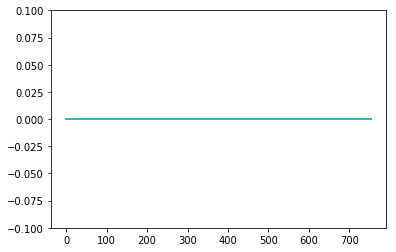

In [76]:
z_k_lithiated = np.array([1, -1])
z_elyte = np.zeros((len(C_Lip_65pct25um[keys_s[2]]), inputs.npoints_cathode))
for j in np.arange(0, len(C_Lip_65pct25um[keys_s[2]])):
    for i in np.arange(0, inputs.npoints_cathode):
        C_charged = np.array([C_Lip_65pct25um[keys_s[2]].iloc[j,i], C_TFSI_65pct25um[keys_s[2]].iloc[j,i]])
        z_elyte[j,i] = np.dot(C_charged, z_k_lithiated)
    
p1 = plt.plot(Cap_Li_65pct25um[keys_s[2]], z_elyte)
plt.ylim((-0.1,0.1))


# Archived code ----------------------------------------------------------------

In [ ]:
Power_Li = np.zeros((len(keys)))
E_rec_Li = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_Lii = Vcell_Li[keys[i]]
    Cap_Lii = Cap_Li[keys[i]]
    Vcell_Li_avg = np.average(Vcell_Lii)
    Power_Li[i] = -Vcell_Li_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec_Li[i] = -Vcell_Li_avg*Cap_Lii.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_Li, -E_rec_Li)

In [ ]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat1'])
    max2 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat2'])
    max3 = max(C_k_Li[keys[i]]['rho_Li2S2(e)_cat3'])
    #max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    #max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_Li, -E_rec_Li, c=Max_conc, cmap='plasma', 
                 vmin=0.3, vmax=1+0.05)
#plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_Li.png')
os.chdir(owd)

In [ ]:
Power_bessler = np.zeros((len(keys)))
E_rec_bessler = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_bessleri = Vcell_bessler[keys[i]]
    Cap_bessleri = Cap_bessler[keys[i]]
    Vcell_bessler_avg = np.average(Vcell_bessleri)
    Power_bessler[i] = -Vcell_bessler_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec_bessler[i] = -Vcell_bessler_avg*Cap_bessleri.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_bessler, -E_rec_bessler)

In [ ]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    #print(C_k_cascade[keys[i]])
    max1 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat1'])
    max2 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat2'])
    max3 = max(C_k_bessler[keys[i]]['rho_S2-(e)_cat3'])
    #max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    #max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)  #Li2S4_max
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

In [ ]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_bessler, -E_rec_bessler, c=Max_conc_norm, cmap='plasma', 
                 vmin=0.3, vmax=1+0.05)
#plt.colorbar(p1)
plt.ylim((75, 285))
plt.xlim((20, 450))
fig.savefig('Ragone_bessler.png')
os.chdir(owd)

## Plotting mean polysulfide concentrations (order >=4)

In [ ]:
def plot_meanPS(SV_df, tags, cycle):

#    C_k = SV_df[tags['rho_el'][cathode.i_S8:-2]].copy()
    meanPS = np.zeros([len(SV_df.index), inputs.npoints_cathode])
    for i in np.arange(inputs.npoints_cathode):
        for j in np.arange(len(SV_df.index)):
            offset = i*10
            C_k = SV_df[tags['rho_el'][5+offset:offset+8]].copy()
            meanPS[j, i] = sum(cat.n_S_atoms[5:-2]*C_k.iloc[j, :])/sum(cat.S_atoms_bool[5:-2]*C_k.iloc[j, :])
          
    "Set up your figure"
    fig = plt.figure(2)
    ax = fig.add_axes([0.2,0.2,0.6,0.75])
    fig.set_size_inches((8.,5.0))
    
    "Formatting for the figure:"
    fs = 20     #font size for plots
    lw = 2.0    #line width for plots
#    font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=fs-1)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')    
    
    for i in np.arange(inputs.npoints_cathode):
        p1, = plt.plot(SV_df.loc[:, 'Time'], meanPS[:, i], '-', linewidth=lw)
        plt.xlim((0, 1770))
        plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
        plt.yticks([2, 3, 4, 5, 6, 7, 8])
        plt.ylabel('Cell Voltage [V]', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        plt.xlabel(r'Capacity $[\mathrm{Ah} \hspace{0.5} \mathrm{kg}^{-1}_{\mathrm{sulfur}}]$', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        
    return